In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = '../data'
accident_path = f'{data_path}/cctv_bump_walk_light.csv'

In [2]:
df = pd.read_csv(accident_path, encoding='utf-8', index_col=0, header=0, engine='python')

In [3]:
df.head()

,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,...,다발지역폴리곤,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,bumps,cctvs,walk,light
사고다발지FID,,,,,,,,,,,,,,,,,,,,,
104688,2020058,1111017500,11110001,서울특별시 종로구1,서울특별시 종로구 숭인동(동묘앞역 부근),43,53,0,19,27,...,"{""type"":""Polygon"",""coordinates"":[[[127.0167759...",11110,종로구,NaN,11110,149,0,0,7,69
104683,2020058,1111017400,11110002,서울특별시 종로구2,서울특별시 종로구 창신동(오간수교남단 부근),28,33,0,6,16,...,"{""type"":""Polygon"",""coordinates"":[[[127.0107653...",11140,중구,NaN,11140,148,0,2,8,35
104684,2020058,1111016400,11110003,서울특별시 종로구3,서울특별시 종로구 종로6가(동대문로터리 부근),25,28,0,6,13,...,"{""type"":""Polygon"",""coordinates"":[[[127.0098693...",11110,종로구,NaN,11110,149,0,0,12,47
104573,2020058,1111016500,11110004,서울특별시 종로구4,서울특별시 종로구 이화동(이화사거리 부근),24,24,0,9,12,...,"{""type"":""Polygon"",""coordinates"":[[[127.0033209...",11110,종로구,NaN,11110,149,2,1,7,62
104773,2020058,1111016100,11110005,서울특별시 종로구5,서울특별시 종로구 종로4가(종로4가일반국도6호선 부근),21,31,0,12,16,...,"{""type"":""Polygon"",""coordinates"":[[[126.9984304...",11110,종로구,NaN,11110,149,2,2,7,46


In [4]:
# print(len(df))
# df = df[df['danger'] != 0.0]
# print(len(df))

In [5]:
df2 = df.loc[:, ['사망자수', '중상자수','경상자수','부상신고자수', 'bumps', 'cctvs', 'walk', 'light']]
df2.head()

,사망자수,중상자수,경상자수,부상신고자수,bumps,cctvs,walk,light
사고다발지FID,,,,,,,,
104688,0,19,27,7,0,0,7,69
104683,0,6,16,11,0,2,8,35
104684,0,6,13,9,0,0,12,47
104573,0,9,12,3,2,1,7,62
104773,0,12,16,3,2,2,7,46


In [28]:
df2.corr()

,사망자수,중상자수,경상자수,부상신고자수,bumps,cctvs,walk,light
사망자수,1.000000,-0.060386,-0.155357,-0.122246,0.035648,0.029200,-0.012522,0.067960
중상자수,-0.060386,1.000000,-0.026084,-0.051029,-0.021011,0.008518,0.048473,0.005414
경상자수,-0.155357,-0.026084,1.000000,0.474960,-0.165347,-0.189262,0.315287,0.321842
부상신고자수,-0.122246,-0.051029,0.474960,1.000000,-0.119061,-0.183355,0.211896,0.193556
bumps,0.035648,-0.021011,-0.165347,-0.119061,1.000000,0.121646,-0.242938,-0.179487
cctvs,0.029200,0.008518,-0.189262,-0.183355,0.121646,1.000000,-0.141402,-0.094158
walk,-0.012522,0.048473,0.315287,0.211896,-0.242938,-0.141402,1.000000,0.592058
light,0.067960,0.005414,0.321842,0.193556,-0.179487,-0.094158,0.592058,1.000000


<AxesSubplot:>

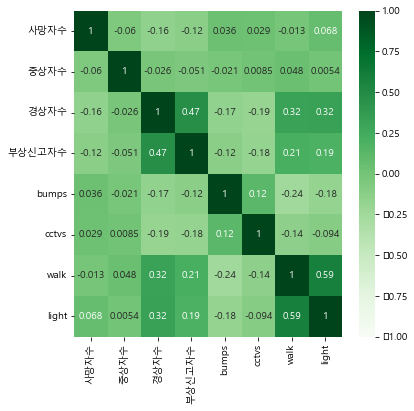

In [30]:
import seaborn as sb
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.rcParams["figure.figsize"] = (6, 6)
sb.heatmap(df2.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )